<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Blurring" data-toc-modified-id="Blurring-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Blurring</a></span><ul class="toc-item"><li><span><a href="#Averaging" data-toc-modified-id="Averaging-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Averaging</a></span></li><li><span><a href="#Gaussian" data-toc-modified-id="Gaussian-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gaussian</a></span></li><li><span><a href="#Median-blurring" data-toc-modified-id="Median-blurring-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Median blurring</a></span></li><li><span><a href="#Bilateral-blurring" data-toc-modified-id="Bilateral-blurring-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Bilateral blurring</a></span></li></ul></li><li><span><a href="#Smoothing" data-toc-modified-id="Smoothing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Smoothing</a></span><ul class="toc-item"><li><span><a href="#Definition-of-various-filters" data-toc-modified-id="Definition-of-various-filters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Definition of various filters</a></span></li><li><span><a href="#Apply-filters-to-image" data-toc-modified-id="Apply-filters-to-image-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Apply filters to image</a></span></li></ul></li></ul></div>

# Smooting and Blurring

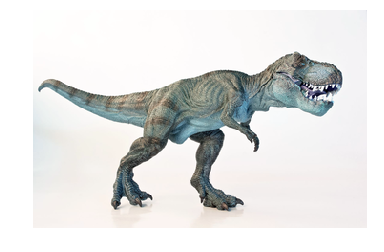

In [9]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('trex.png')
plt.imshow(image)
plt.axis('off')
plt.show()

## Blurring
- Reduces details in an image

### Averaging
- Define k x k sliding window, also called kernel (where k is odd)
- Pixel at the center of this window is set to the average of all pixels in the center

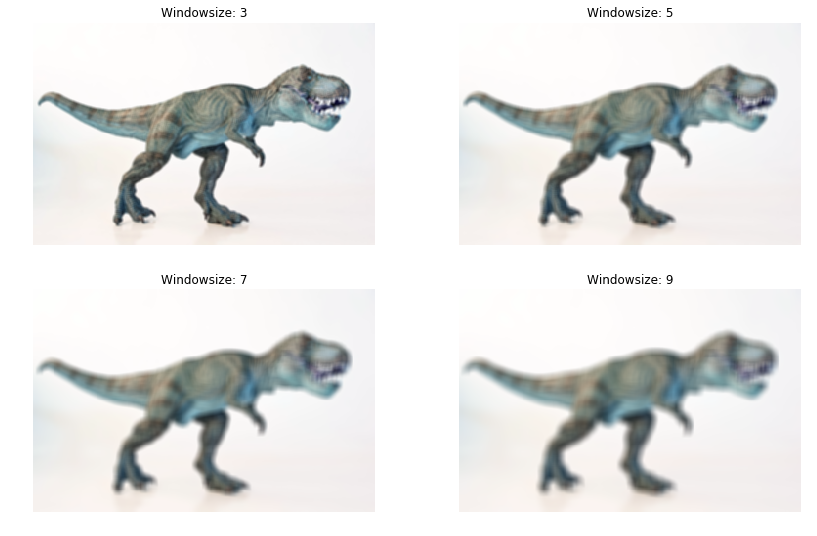

In [10]:
window_sizes = [3, 5, 7, 9]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9), squeeze=True)

for window_size, ax in zip(window_sizes, axs.reshape(-1)):
    blurred = cv2.blur(image, (window_size, window_size))
    ax.imshow(blurred)
    ax.set_title('Windowsize: {}'.format(window_size))
    ax.axis('off')
plt.show()

### Gaussian
- similar to ordinary averaging, just taking weighted mean, where pixels that are closer to the central pixel contribute more weight
- images look more natural than using simple averaging

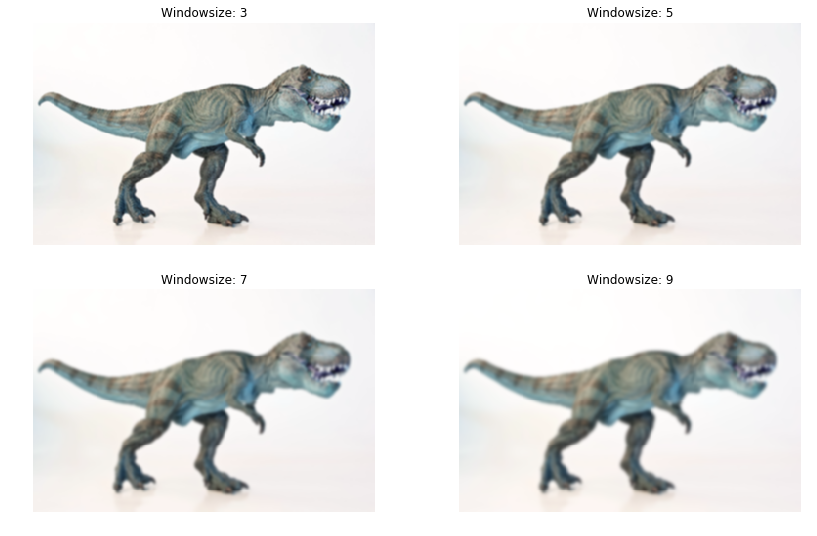

In [11]:
sigma = 0  # compute standard deviation based on the kernel size

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9), squeeze=True)

for window_size, ax in zip(window_sizes, axs.reshape(-1)):
    blurred = cv2.GaussianBlur(image, (window_size, window_size), sigma)
    ax.imshow(blurred)
    ax.set_title('Windowsize: {}'.format(window_size))
    ax.axis('off')
plt.show()

### Median blurring
- instead of taking mean of surrounding pixels, take the median
- can filter out salt and pepper out of images (noise reduction)

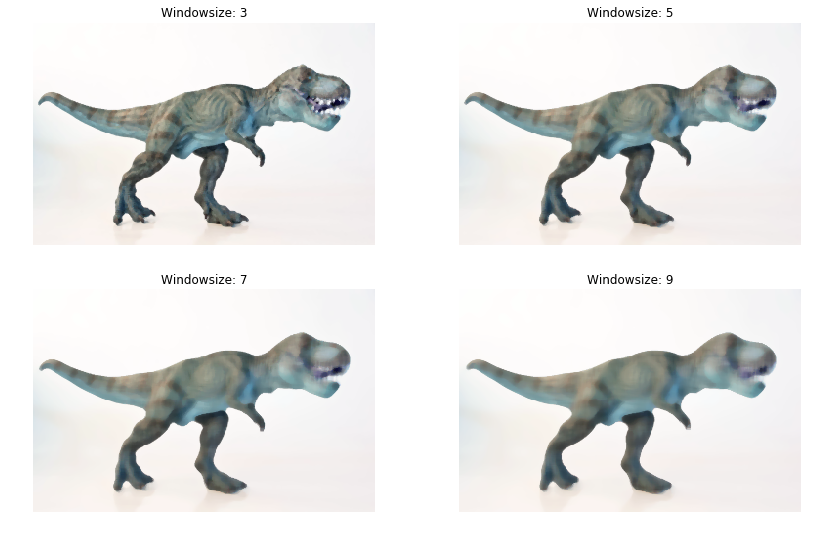

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9), squeeze=True)

for window_size, ax in zip(window_sizes, axs.reshape(-1)):
    blurred = cv2.medianBlur(image, window_size)
    ax.imshow(blurred)
    ax.set_title('Windowsize: {}'.format(window_size))
    ax.axis('off')
plt.show()

### Bilateral blurring
- reduces noise while still maintaining edges
- using two gaussian distributions: for the distance from the central pixel, for the difference in the intensity compared to central pixel

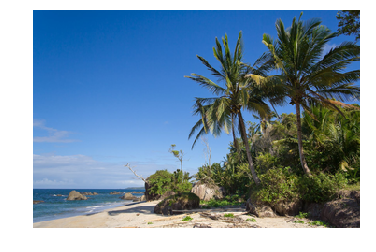

In [13]:
b, g, r = cv2.split(cv2.imread('beach.png'))
image = cv2.merge([r, g, b])

plt.imshow(image)
plt.axis('off')
plt.show()

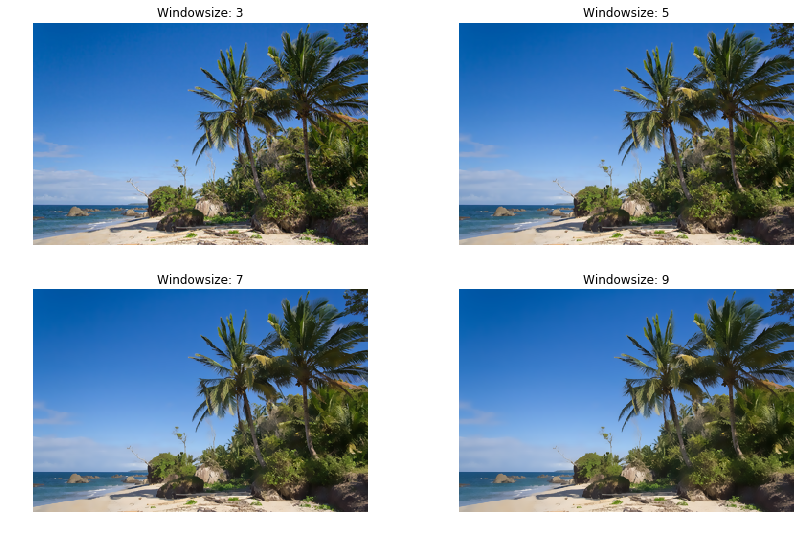

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9), squeeze=True)

for window_size, ax in zip(window_sizes, axs.reshape(-1)):
    blurred = cv2.bilateralFilter(image, window_size, window_size*5-4, window_size*5-4)
    ax.imshow(blurred)
    ax.set_title('Windowsize: {}'.format(window_size))
    ax.axis('off')
plt.show()

## Smoothing

### Definition of various filters

In [15]:
import numpy as np

# detects blur in images
laplacian = np.array(
    (
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]),
    dtype="int"
)
 
sobelX = np.array(
    (
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]),
    dtype="int"
)
 
sobelY = np.array(
    (
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]),
    dtype="int"
)

# sharpens the image
sharpen = np.array(
    (
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]), 
    dtype="int"
)

### Apply filters to image

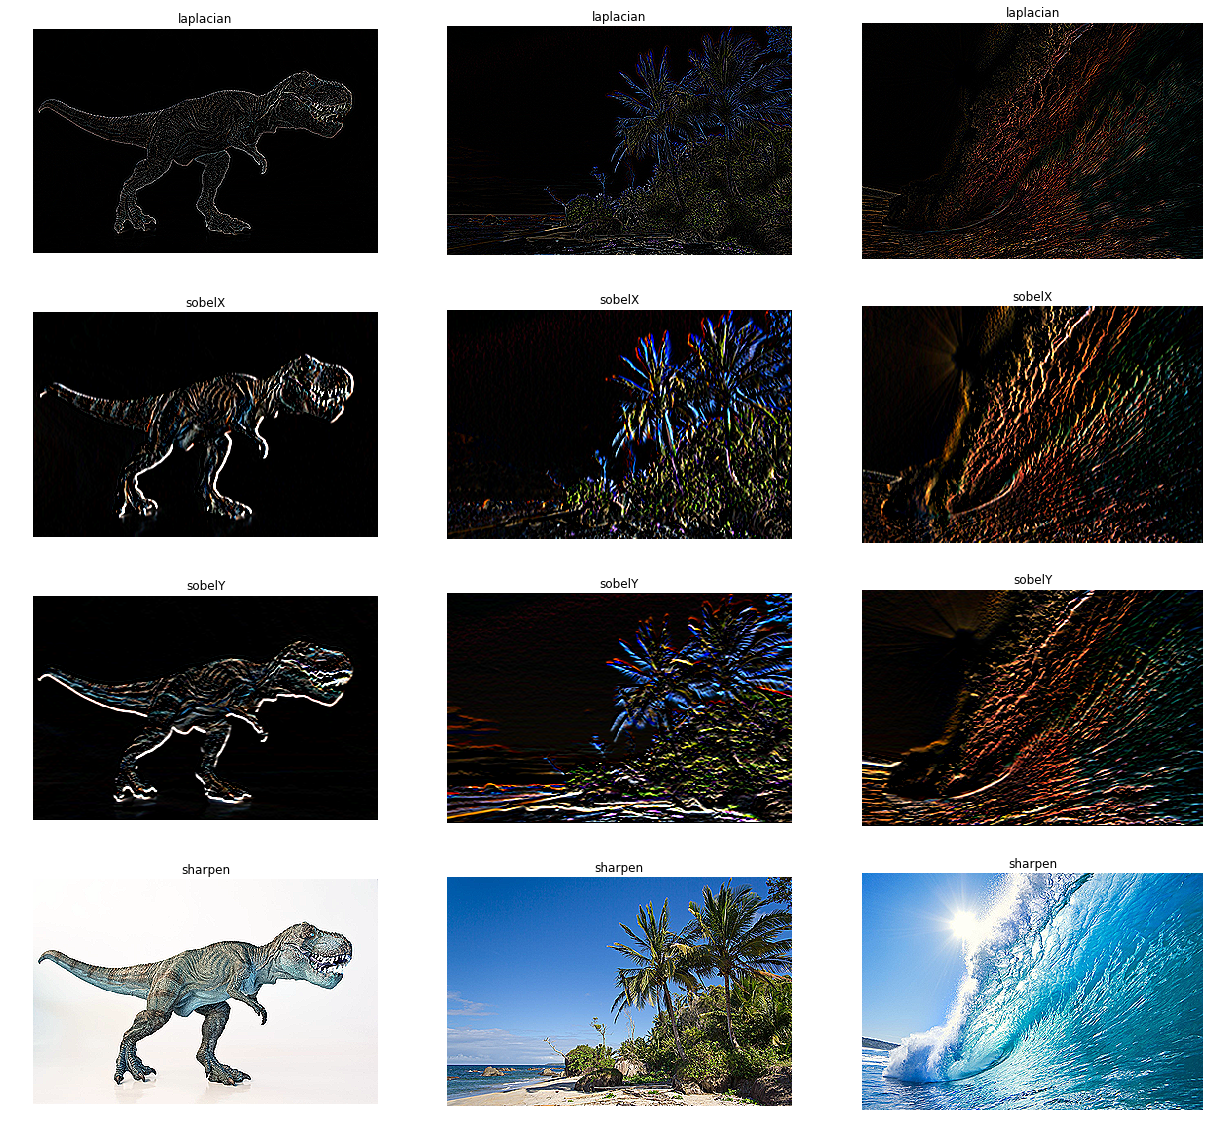

In [16]:
trex = cv2.imread('trex.png')

b, g, r = cv2.split(cv2.imread('beach.png'))
beach = cv2.merge([r, g, b])

b, g, r = cv2.split(cv2.imread('wave.png'))
wave = cv2.merge([r, g, b])

images = [trex, beach, wave]
filters = [laplacian, sobelX, sobelY, sharpen]
filter_names = ['laplacian', 'sobelX', 'sobelY', 'sharpen']
fig, axs = plt.subplots(
    nrows=len(filters),
    ncols=len(images),
    figsize=(21, 20),
    squeeze=True
)

for filter_,  filter_name, axs_col in zip(filters, filter_names, axs):
    for image, ax in zip(images, axs_col):
        convolved = cv2.filter2D(image, -1, filter_)
        ax.imshow(convolved, cmap='gray')
        ax.set_title(filter_name)
        ax.axis('off')
plt.show()